In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
import seaborn as sb
import pygmnormalize as gmn
from scipy.cluster import hierarchy
from scipy.stats import variation

### Load Data

In [3]:
# 325 patients; expression data and clinical data
gene_data = pd.read_csv('data/study_1/expression_data.csv')
clinical_data = pd.read_csv('data/study_1/clinical_data.csv')

In [4]:
gene_data

,Gene_Name,CGGA_1001,CGGA_1006,CGGA_1007,CGGA_1011,CGGA_1015,CGGA_1019,CGGA_1022,CGGA_1023,CGGA_1024,...,CGGA_1246,CGGA_1275,CGGA_1450,CGGA_1460,CGGA_1475,CGGA_243,CGGA_247,CGGA_738,CGGA_759,CGGA_D30
0,A1BG,12.64,7.03,30.09,6.64,1.83,39.03,12.96,9.28,2.35,...,4.46,28.42,19.32,2.24,18.89,4.03,5.29,4.64,7.07,31.41
1,A1BG-AS1,2.12,1.13,6.64,4.32,1.39,4.46,3.25,1.90,1.22,...,1.57,8.36,2.21,1.60,5.31,2.47,3.69,0.85,1.99,2.65
2,A2M,452.92,106.54,206.70,707.17,824.32,155.14,538.33,26.39,219.35,...,87.20,243.89,73.80,111.50,340.53,108.06,97.24,160.70,263.66,192.54
3,A2M-AS1,3.30,0.13,0.63,1.61,1.34,3.08,0.72,1.96,1.48,...,0.42,1.02,0.22,0.15,0.91,0.33,0.03,0.38,0.48,2.51
4,A2ML1,0.04,0.33,4.96,1.59,0.00,0.10,0.39,2.34,0.68,...,2.58,0.55,0.15,1.75,0.05,1.55,0.71,3.33,0.60,3.86
5,A2MP1,0.23,0.00,0.15,0.14,1.30,0.06,0.00,0.06,0.16,...,0.15,0.00,0.00,0.07,0.00,0.19,0.14,0.11,0.02,0.09
6,A3GALT2,0.00,1.00,0.17,0.00,0.16,0.00,0.00,0.29,0.05,...,0.00,0.00,0.00,0.10,0.20,0.00,0.27,0.54,0.00,0.19
7,A4GALT,3.67,3.16,6.67,2.07,9.41,4.10,3.59,1.34,4.32,...,1.77,3.98,2.38,2.85,1.88,0.85,1.20,2.69,2.62,3.36
8,A4GNT,0.04,1.07,0.00,0.11,0.13,0.00,0.04,0.00,0.03,...,0.06,0.05,0.00,0.00,0.04,0.00,0.73,1.37,0.16,0.00
9,AAAS,27.79,24.15,26.03,35.62,35.83,44.77,30.55,97.98,25.78,...,47.54,48.17,36.80,52.14,31.42,29.28,45.31,38.59,34.63,24.39


### Sample Data Samples - Expression

In [5]:
gene_data.head()

,Gene_Name,CGGA_1001,CGGA_1006,CGGA_1007,CGGA_1011,CGGA_1015,CGGA_1019,CGGA_1022,CGGA_1023,CGGA_1024,...,CGGA_1246,CGGA_1275,CGGA_1450,CGGA_1460,CGGA_1475,CGGA_243,CGGA_247,CGGA_738,CGGA_759,CGGA_D30
0,A1BG,12.64,7.03,30.09,6.64,1.83,39.03,12.96,9.28,2.35,...,4.46,28.42,19.32,2.24,18.89,4.03,5.29,4.64,7.07,31.41
1,A1BG-AS1,2.12,1.13,6.64,4.32,1.39,4.46,3.25,1.90,1.22,...,1.57,8.36,2.21,1.60,5.31,2.47,3.69,0.85,1.99,2.65
2,A2M,452.92,106.54,206.70,707.17,824.32,155.14,538.33,26.39,219.35,...,87.20,243.89,73.80,111.50,340.53,108.06,97.24,160.70,263.66,192.54
3,A2M-AS1,3.30,0.13,0.63,1.61,1.34,3.08,0.72,1.96,1.48,...,0.42,1.02,0.22,0.15,0.91,0.33,0.03,0.38,0.48,2.51
4,A2ML1,0.04,0.33,4.96,1.59,0.00,0.10,0.39,2.34,0.68,...,2.58,0.55,0.15,1.75,0.05,1.55,0.71,3.33,0.60,3.86


### Sample Data Samples - Clinical

In [6]:
clinical_data.head()

,CGGA_ID,PRS_type,Histology,Grade,Gender,Age,OS,Censor,Radio_status,Chemo_status,IDH_mutation_status,1p19q_codeletion_status
0,CGGA_1001,Primary,GBM,WHO IV,Male,11,3428.0,0.0,0.0,1.0,Wildtype,Non-codel
1,CGGA_1006,Primary,AA,WHO III,Male,42,254.0,1.0,1.0,1.0,Wildtype,Non-codel
2,CGGA_1007,Primary,GBM,WHO IV,Female,57,345.0,1.0,1.0,1.0,Wildtype,Non-codel
3,CGGA_1011,Primary,GBM,WHO IV,Female,46,109.0,1.0,1.0,0.0,Wildtype,Non-codel
4,CGGA_1015,Primary,GBM,WHO IV,Male,62,164.0,1.0,1.0,0.0,Wildtype,Non-codel


### Data Statistics

In [7]:
print(f'Number of Data Samples: {len(gene_data.columns)-1}')
print(f'Number of Genes: {len(gene_data.index)}')

Number of Data Samples: 325
Number of Genes: 24326


The original data set consists of 325 data samples with 24000+ genes.

## Data Preprocessing

- Impute the class labels (tumor grade) and histology data as some of the values are 'NaN'
- Impute using the most frequent value in the column

In [8]:
class_label_col = ['Grade']
histology_col = ['Histology']
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
class_labels = imputer.fit_transform(clinical_data[class_label_col])
histology = imputer.fit_transform(clinical_data[histology_col])
class_labels_categories = list(np.unique(class_labels))

### Visualize Class Distribution

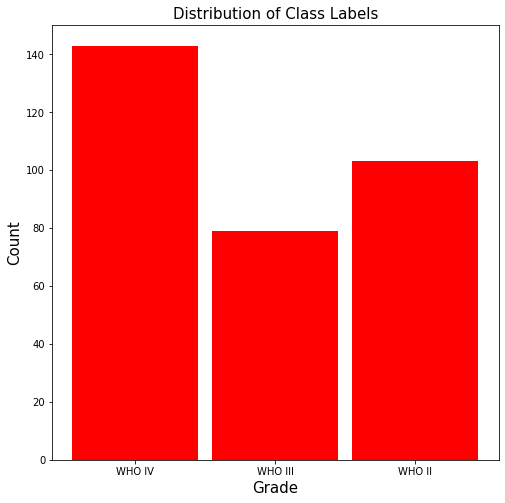

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.hist(class_labels, bins=range(4),  color=['red'], rwidth=0.90, align='left')
ax.set_xlabel('Grade', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title('Distribution of Class Labels', size=15)
plt.show()

In [10]:
unique, counts = np.unique(class_labels, return_counts=True)
print('Counts for labels: ')
for i in range(len(unique)):
    print(f'Class: {unique[i]}, Count: {counts[i]}')

Counts for labels: 
Class: WHO II, Count: 103
Class: WHO III, Count: 79
Class: WHO IV, Count: 143


### Visualize Histology Distribution

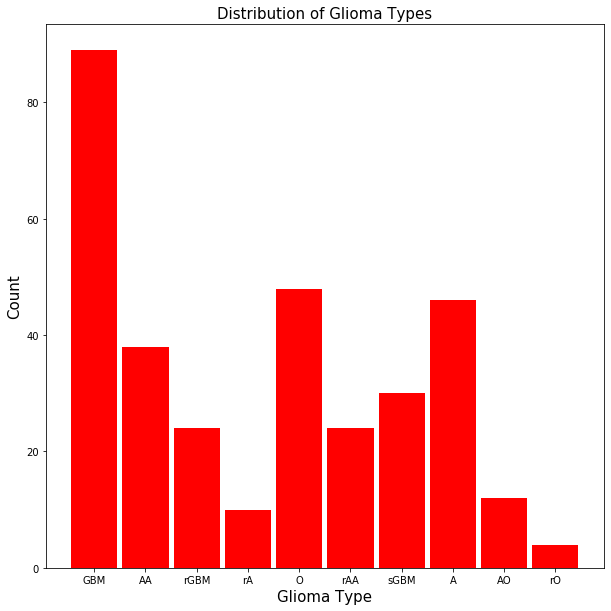

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(histology, bins=range(11),  color=['red'], rwidth=0.90, align='left')
ax.set_xlabel('Glioma Type', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title('Distribution of Glioma Types', size=15)
plt.show()

In [12]:
unique, counts = np.unique(histology, return_counts=True)
print('Counts for glioma types: ')
for i in range(len(unique)):
    print(f'Type: {unique[i]}, Count: {counts[i]}')

Counts for glioma types: 
Type: A, Count: 46
Type: AA, Count: 38
Type: AO, Count: 12
Type: GBM, Count: 89
Type: O, Count: 48
Type: rA, Count: 10
Type: rAA, Count: 24
Type: rGBM, Count: 24
Type: rO, Count: 4
Type: sGBM, Count: 30


### Visualize Read Counts by Sample

In [13]:
# Store the gene_names in a separate column so that we can work on the gene_data matrix directly
gene_names = gene_data['Gene_Name']
gene_data = gene_data.drop(columns=['Gene_Name'])

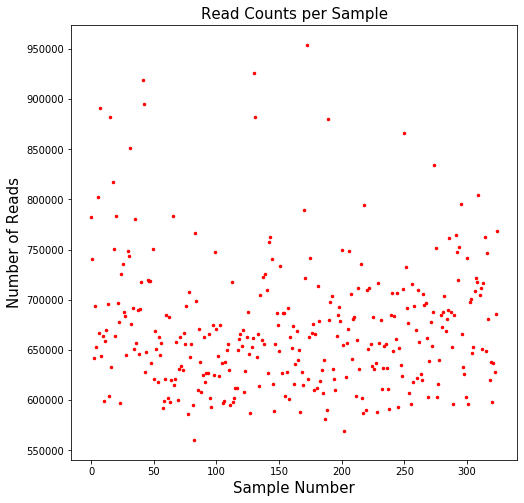

In [14]:
sample_sums = gene_data.sum(axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(range(325), sample_sums, 'r.', markersize=5)
ax.set_xlabel('Sample Number', size=15)
ax.set_ylabel('Number of Reads', size=15)
ax.set_title('Read Counts per Sample', size=15)
plt.show()

### Visualize Read Counts by Gene

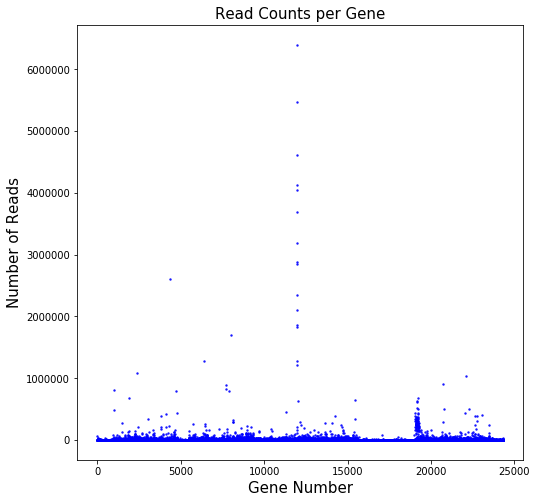

In [15]:
gene_sums = gene_data.sum(axis = 1)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(range(len(gene_sums)), gene_sums, 'b.', alpha = .75, markersize=3)
ax.set_xlabel('Gene Number', size=15)
ax.set_ylabel('Number of Reads', size=15)
ax.set_title('Read Counts per Gene', size=15)
plt.show()

## Further data processing
- Select a subset of the over 24 000 features to investigate and analyze 
- NOTE: the paper that used the Chinese Glioma data did a feature selection thing called t-SNE. I tried to do it but couldn't figure it out
<br/><br/>
- This is the 'standard pipeline' for bulk RNA-seq DATA according to Townes, F.W., Hicks, S.C., Aryee, M.J. et al. Feature selection and dimension reduction for single-cell RNA-Seq based on a multinomial model. Genome Biol 20, 295 (2019). https://doi.org/10.1186/s13059-019-1861-6:
    - "First, raw counts are normalized by scaling of sample-specific size factors, followed by log transformation, which attempts to reduce skewness. 
    - Next, feature selection involves identifying the top 500–2000 genes by computing either their coefficient of variation (highly variable genes [16, 17]) or average expression level (highly expressed genes) across all cells [15]. 
    - Principal component analysis (PCA) [19] is the most popular dimension reduction method (see for example tutorials for Seurat [17] and Cell Ranger [5]). 
        - PCA compresses each cell’s 2000-dimensional expression profile into, say, a 10-dimensional vector of principal component coordinates or latent factors. 
        - Prior to PCA, data are usually centered and scaled so that each gene has mean 0 and standard deviation 1 (z-score transformation). 
    - Finally, a clustering algorithm can be applied to group cells with similar representations in the low-dimensional PCA space."
<br/><br/>
- There are a lot more exploration and additional quality control steps suggested in https://kkorthauer.org/fungeno2019/singlecell/vignettes/1.1-preprocess-readcounts.html
<br/><br/>
- I did the selecting by variance and the PCA (with scaling)
- Still need to do:
    - Normalization of raw counts
        - Trimmed Mean of M 
            - Recommended by: https://hbctraining.github.io/DGE_workshop/lessons/02_DGE_count_normalization.html
            - Explanation/derivation: https://genomebiology-biomedcentral-com.ezproxy.cul.columbia.edu/articles/10.1186/gb-2010-11-3-r25
        - Log transformation (?)
        - Size factors (?)
    - Other quality control exploration/preprocessing (?)
    - Can also try selecting by expression level instead of variance

### Train-Test split

In [16]:
# Train-test split 90/10 as this is train/test. 
# We may further split the training data into training and validation data
# stratify=class_labels will make sure that the different classes are equally represented between the training
# and testing data
train_genes, test_genes, train_lbl, test_lbl = train_test_split(gene_data.T, class_labels, 
                                                                test_size=0.10, 
                                                                random_state=0,
                                                                shuffle=True, 
                                                                stratify=class_labels)

### Filter based on read count (i.e. 70% of samples have < 1 count for this gene)

In [17]:
low_exp = []
for i in train_genes.columns:
    count = 0
    for j in train_genes[i]:
        if j < 1: 
            count += 1
    if count/325 >= 0.70:
        low_exp.append(i)

In [18]:
cols_filtered = [x for x in train_genes.columns if x not in low_exp]
train_genes = train_genes[cols_filtered]

### Sequence Data Normalization
- Both of the methods below seem to be good options for normalizing data when comparing gene expression across different samples (and therefore across different gliomas)
<br/> ***We decided to remove Relative Log Expression and just do TMM***

#### Trimmed Mean of M
- Uses log2 transform on the data as part of the normalization (log ratio) but the final values arent log values
- Will apply log transform after the data is normalized

In [19]:
# Training Data before applying TMM
train_genes.head()

,0,1,2,4,7,9,10,12,13,14,...,24315,24316,24317,24318,24319,24320,24322,24323,24324,24325
CGGA_171,12.66,1.21,188.46,1.14,1.93,25.41,4.26,7.95,3.18,12.23,...,4.43,2.06,3.90,1.57,3.05,2.68,4.59,35.90,3.56,5.64
CGGA_1024,2.35,1.22,219.35,0.68,4.32,25.78,8.05,6.68,6.91,22.71,...,6.84,6.93,18.18,1.43,3.08,9.56,7.66,147.99,5.79,10.36
CGGA_835,7.11,1.73,82.60,3.43,1.36,36.54,3.99,7.10,4.36,10.29,...,4.49,2.18,5.92,2.14,4.49,6.74,5.21,45.83,4.60,4.43
CGGA_738,4.64,0.85,160.70,3.33,2.69,38.59,8.70,8.09,5.38,9.99,...,3.52,2.85,6.89,2.60,3.89,12.87,9.91,72.42,15.13,12.23
CGGA_479,13.11,2.65,133.27,1.14,6.01,27.09,4.40,7.01,3.63,8.20,...,4.04,3.69,3.80,2.48,3.81,11.88,5.88,51.67,11.34,7.31


In [20]:
# Training data after applying TMM
# Expect genes as rows and samples as columns
normalized_tmm_train_genes = gmn.tmm_normalization(train_genes.T).T
normalized_tmm_train_genes.head()

,0,1,2,4,7,9,10,12,13,14,...,24315,24316,24317,24318,24319,24320,24322,24323,24324,24325
CGGA_171,18.586436,1.776429,276.682446,1.673660,2.833477,37.305003,6.254204,11.671577,4.668631,17.955143,...,6.503785,3.024333,5.725679,2.304953,4.477775,3.934569,6.738684,52.705613,5.226518,8.280213
CGGA_1024,2.436149,1.264724,227.391214,0.704928,4.478368,26.725076,8.345107,6.924884,7.163316,23.542532,...,7.090750,7.184049,18.846466,1.482423,3.192911,9.910463,7.940810,153.415208,6.002257,10.739790
CGGA_835,8.503976,2.069181,98.794437,4.102481,1.626640,43.703980,4.772274,8.492016,5.214815,12.307443,...,5.370303,2.607408,7.080667,2.559565,5.370303,8.061435,6.231465,54.815364,5.501869,5.298539
CGGA_738,4.307423,0.789075,149.181639,3.091318,2.497191,35.824017,8.076417,7.510140,4.994382,9.273955,...,3.267700,2.645723,6.396151,2.413642,3.611180,11.947528,9.199689,67.229212,14.045540,11.353400
CGGA_479,16.415838,3.318228,166.875575,1.427464,7.525491,33.921058,5.509511,8.777653,4.545347,10.267725,...,5.058733,4.620476,4.758214,3.105361,4.770736,14.875680,7.362710,64.699189,14.199512,9.153301


### Log Transformation of data
#### Dipika's Questions:
- Not positive if this is needed or not after normalizing?
<br/>***I think yes, we should log transform after normalizing***
- Should we plot what the data after we normalize and log-transform
<br/>***On it!***

In [21]:
log_normalized_tmm_train_genes = pd.DataFrame(np.log2(normalized_tmm_train_genes, out=np.zeros_like(normalized_tmm_train_genes), where=(normalized_tmm_train_genes!=0)))
log_normalized_tmm_train_genes.head()

,0,1,2,3,4,5,6,7,8,9,...,17707,17708,17709,17710,17711,17712,17713,17714,17715,17716
0,4.216178,0.828980,8.112087,0.743007,1.502574,5.221297,2.644826,3.544928,2.223000,4.166325,...,2.701279,1.596617,2.517447,1.204737,2.162782,1.976206,2.752467,5.719885,2.385850,3.049668
1,1.284603,0.338823,7.829033,-0.504452,2.162973,4.740122,3.060931,2.791790,2.840628,4.557198,...,2.825938,2.844797,4.236222,0.567957,1.674872,3.308952,2.989286,7.261298,2.585505,3.424894
2,3.088138,1.049060,6.626358,2.036497,0.701895,5.449693,2.254677,3.086107,2.382616,3.621459,...,2.425003,1.382616,2.823885,1.355899,2.425003,3.011037,2.639571,5.776508,2.459922,2.405595
3,2.106825,-0.341765,7.220926,1.628222,1.320306,5.162855,3.013715,2.908840,2.320306,3.213185,...,1.708275,1.403662,2.677204,1.271212,1.852470,3.578640,3.201585,6.071016,3.812040,3.505053
4,4.037017,1.730413,7.382629,0.513455,2.911786,5.084109,2.461924,3.133835,2.184390,3.360045,...,2.338776,2.208042,2.250420,1.634761,2.254212,3.894884,2.880237,6.015676,3.827769,3.194292


#### Visualize Distribution of Counts per Gene after Normalized and Log-transformed

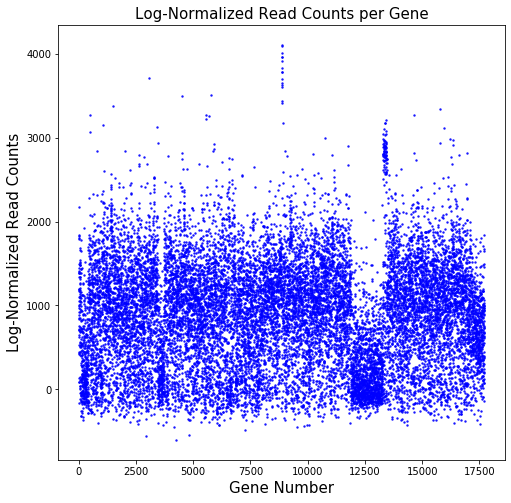

In [22]:
log_norm_sums = log_normalized_tmm_train_genes.sum(axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(range(len(log_norm_sums)), log_norm_sums, 'b.', alpha = .75, markersize=3)
ax.set_xlabel('Gene Number', size=15)
ax.set_ylabel('Log-Normalized Read Counts', size=15)
ax.set_title('Log-Normalized Read Counts per Gene', size=15)
plt.show()

### Selecting Features based on Variance

#### Visualize Variance

In [23]:
selector = VarianceThreshold(threshold=0.5)
high_var_train_genes = pd.DataFrame(selector.fit_transform(log_normalized_tmm_train_genes))

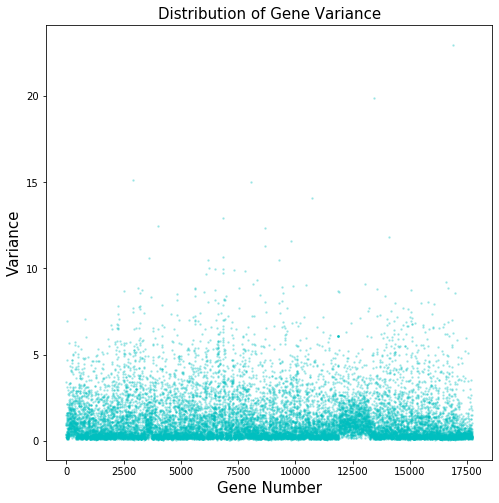

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(selector.variances_, 'c.', alpha=0.25, markersize=3)
ax.set_xlabel('Gene Number', size=15)
ax.set_ylabel('Variance', size=15)
ax.set_title('Distribution of Gene Variance', size=15)
plt.show()

#### Close-up of the distribution

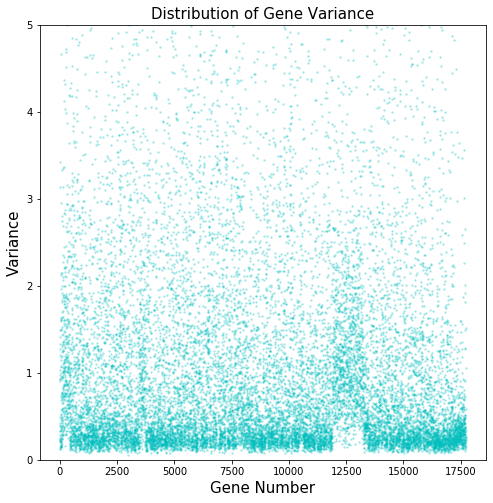

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(selector.variances_, 'c.', alpha=0.25, markersize=3)
ax.set_xlabel('Gene Number', size=15)
ax.set_ylabel('Variance', size=15)
ax.set_ylim(bottom=0, top = 5)
ax.set_title('Distribution of Gene Variance', size=15)
plt.show()

#### Coefficient of Variance (Remove High Variance)

In [26]:
high_var = []
for i in log_normalized_tmm_train_genes.columns:
    if variation(log_normalized_tmm_train_genes[i]) >= 4:
        high_var.append(i)
        
low_var_cols = [x for x in log_normalized_tmm_train_genes.columns if x not in high_var]
low_var_train_genes = log_normalized_tmm_train_genes[low_var_cols]

print(f"Filter reduced number of genes by {len(log_normalized_tmm_train_genes.columns) - len(low_var_train_genes.columns)} from {len(log_normalized_tmm_train_genes.columns)} to {len(low_var_train_genes.columns)}")
low_var_train_genes.head()


Filter reduced number of genes by 759 from 17717 to 16958


,0,1,2,4,5,6,7,8,9,10,...,17707,17708,17709,17710,17711,17712,17713,17714,17715,17716
0,4.216178,0.828980,8.112087,1.502574,5.221297,2.644826,3.544928,2.223000,4.166325,1.949036,...,2.701279,1.596617,2.517447,1.204737,2.162782,1.976206,2.752467,5.719885,2.385850,3.049668
1,1.284603,0.338823,7.829033,2.162973,4.740122,3.060931,2.791790,2.840628,4.557198,2.069864,...,2.825938,2.844797,4.236222,0.567957,1.674872,3.308952,2.989286,7.261298,2.585505,3.424894
2,3.088138,1.049060,6.626358,0.701895,5.449693,2.254677,3.086107,2.382616,3.621459,2.993810,...,2.425003,1.382616,2.823885,1.355899,2.425003,3.011037,2.639571,5.776508,2.459922,2.405595
3,2.106825,-0.341765,7.220926,1.320306,5.162855,3.013715,2.908840,2.320306,3.213185,3.025277,...,1.708275,1.403662,2.677204,1.271212,1.852470,3.578640,3.201585,6.071016,3.812040,3.505053
4,4.037017,1.730413,7.382629,2.911786,5.084109,2.461924,3.133835,2.184390,3.360045,2.242807,...,2.338776,2.208042,2.250420,1.634761,2.254212,3.894884,2.880237,6.015676,3.827769,3.194292


#### Variance Threshold (Remove Low Variance)

In [27]:
## Note: Already fit the VarianceThreshold with the visualizations above

print(f"Filter reduced number of genes by {len(log_normalized_tmm_train_genes.columns) - len(high_var_train_genes.columns)} from {len(log_normalized_tmm_train_genes.columns)} to {len(high_var_train_genes.columns)}")
high_var_train_genes.head()

Filter reduced number of genes by 7781 from 17717 to 9936


,0,1,2,3,4,5,6,7,8,9,...,9926,9927,9928,9929,9930,9931,9932,9933,9934,9935
0,4.216178,0.828980,8.112087,0.743007,1.502574,1.949036,3.874457,7.081137,4.097469,3.577228,...,3.002874,0.059864,5.959965,0.369548,1.898801,0.768098,0.336381,1.596617,2.517447,5.719885
1,1.284603,0.338823,7.829033,-0.504452,2.162973,2.069864,3.515303,6.065851,1.484901,2.466077,...,0.314976,-1.891475,5.095899,0.228265,2.585505,1.500843,0.000000,2.844797,4.236222,7.261298
2,3.088138,1.049060,6.626358,2.036497,0.701895,2.993810,4.341501,7.230866,0.669714,3.693917,...,3.046974,1.453636,5.445343,-1.578213,2.625659,1.199394,0.000000,1.382616,2.823885,5.776508
3,2.106825,-0.341765,7.220926,1.628222,1.320306,3.025277,3.822491,6.497809,2.545760,3.804392,...,1.357368,1.623883,5.054991,1.428753,2.367785,1.628222,-0.009689,1.403662,2.677204,6.071016
4,4.037017,1.730413,7.382629,0.513455,2.911786,2.242807,6.884066,7.056826,4.293433,4.151223,...,2.284191,2.590458,6.063999,1.415274,1.928492,2.227459,-0.461454,2.208042,2.250420,6.015676


### Remove highly correlated features
- This can decrease the dimensionality of the data while eliminating redundancy

#### First on the data with low variance

In [ ]:
cov = abs(low_var_train_genes.corr().to_numpy())

In [ ]:
# order = np.array(hierarchy.dendrogram(hierarchy.ward(cov),no_plot=True)['ivl'], dtype=int)
# plt.figure(figsize=(8, 8), dpi=100)
# plt.imshow(cov[order, :][:, order])
# plt.show()

In [ ]:
filtered_cov_low_var = []
for i in range(len(low_var_train_genes.columns)):
    row = []
    for j in range(len(low_var_train_genes.columns)):
        if cov[i][j] > 0.70 and i != j:
            row.append(j)
    filtered_cov_low_var.append(row)

In [ ]:
filtered = []
for i in range(len(filtered_cov_low_var)):
    if len(filtered_cov_low_var[i]) > 0:
        filtered.append(i)

In [ ]:
to_remove = []
to_keep = []
for gene in filtered:
    # The gene is not correlated to anything we've seen so far
    if gene not in to_remove:
        # remove all values 
        vals = filtered_cov_low_var[gene]
        for val in vals:
            if val not in to_remove:
                to_remove.append(val)
        to_keep.append(gene)

#### Get the new filtered features

In [ ]:
cols_filtered = [x for x in low_var_train_genes.columns if x not in to_remove]

#### Plot covariance matrix after removing highly correlated features

In [ ]:
cov = abs(low_var_train_genes[cols_filtered].corr().to_numpy())

In [ ]:
# order = np.array(hierarchy.dendrogram(hierarchy.ward(cov),no_plot=True)['ivl'], dtype=int)
# plt.figure(figsize=(8, 8), dpi=100)
# plt.imshow(cov[order, :][:, order])
# plt.show()

In [ ]:
low_var_train_genes = low_var_train_genes[cols_filtered]

#### Next on the data with high variance

In [ ]:
cov = abs(high_var_train_genes.corr().to_numpy())

In [ ]:
order = np.array(hierarchy.dendrogram(hierarchy.ward(cov),no_plot=True)['ivl'], dtype=int)
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov[order, :][:, order])
plt.show()

In [ ]:
filtered_cov_high_var = []
for i in range(len(high_var_train_genes.columns)):
    row = []
    for j in range(len(high_var_train_genes.columns)):
        if cov[i][j] > 0.70 and i != j:
            row.append(j)
    filtered_cov_high_var.append(row)

In [ ]:
filtered = []
for i in range(len(filtered_cov_high_var)):
    if len(filtered_cov_high_var[i]) > 0:
        filtered.append(i)

In [ ]:
to_remove = []
to_keep = []
for gene in filtered:
    # The gene is not correlated to anything we've seen so far
    if gene not in to_remove:
        # remove all values 
        vals = filtered_cov_high_var[gene]
        for val in vals:
            if val not in to_remove:
                to_remove.append(val)
        to_keep.append(gene)

#### Get the new filtered features

In [ ]:
cols_filtered = [x for x in high_var_train_genes.columns if x not in to_remove]

#### Plot covariance matrix after removing highly correlated features

In [ ]:
cov = abs(high_var_train_genes[cols_filtered].corr().to_numpy())

In [ ]:
# order = np.array(hierarchy.dendrogram(hierarchy.ward(cov),no_plot=True)['ivl'], dtype=int)
# plt.figure(figsize=(8, 8), dpi=100)
# plt.imshow(cov[order, :][:, order])
# plt.show()

In [ ]:
high_var_train_genes = high_var_train_genes[cols_filtered]

### Batch Effects
- Do we have to worry about them?
- May have to do this high up in the process
#### Aimee's thoughts
- Since each sample was collected at a different time, I think there actually may not be batch effects-- actually, there are probably 325 batches so normalization probably took care of that
- I was also having a hard time finding methods of batch correction for when you don't know the batches beforehand, and that don't remove feature variables
- Unrelated, is there another way to do the covariance stuff? My computer is having a hard time with the lines:
        cov = abs(high_var_train_genes.corr().to_numpy())
        order = np.array(hierarchy.dendrogram(hierarchy.ward(cov),no_plot=True)['ivl'], dtype=int)
        plt.figure(figsize=(8, 8), dpi=100)
        plt.imshow(cov[order, :][:, order])
        plt.show()

## Unsupervised Machine Learning Method Analysis

### Scale before PCA

In [ ]:
scaler = StandardScaler()
train_genes_scaled = scaler.fit_transform(train_genes)
test_genes_scaled = scaler.transform(test_genes)

### PCA

- For this, I would use PCA to cluster the data by using the top n number of PCs

In [ ]:
# Make an instance of the model that explains 95% of the variance
pca = PCA(.95)

# Fit the model
pca.fit(train_genes_filtered)
pca.transform(train_genes_filtered)
pca.transform(test_genes_filtered)

print(f'PCA with {pca.n_components_} components explains {sum(pca.explained_variance_ratio_)} of the variance after filtering.')